In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("emails.csv")

In [3]:
df.sample(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
1525,Email 1526,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5015,Email 5016,4,3,1,0,2,3,36,2,0,...,0,0,0,0,0,0,0,0,0,0
4553,Email 4554,9,9,1,4,3,7,51,8,1,...,0,0,0,0,0,0,0,1,0,1
5041,Email 5042,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1401,Email 1402,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
544,Email 545,4,4,1,1,2,1,35,2,0,...,0,0,0,0,0,0,0,0,0,0
822,Email 823,2,3,3,1,2,1,31,1,1,...,0,0,0,0,0,0,0,0,0,0
5011,Email 5012,13,12,1,8,4,6,91,11,1,...,0,0,0,0,0,0,0,2,0,0
1408,Email 1409,4,8,1,1,2,3,60,5,2,...,0,0,0,0,0,0,0,0,0,1
941,Email 942,1,2,1,1,2,1,33,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [6]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [8]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [9]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [10]:
df.dtypes.value_counts()

int64     3001
object       1
Name: count, dtype: int64

In [11]:
neg_count = (df.drop(columns=['Email No.', 'Prediction']) < 0).sum().sum()
print("Negative values found:", neg_count)

Negative values found: 0


In [12]:
X = df.drop(columns=['Email No.', 'Prediction'])
y = df['Prediction']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [15]:
from sklearn.preprocessing import Normalizer, StandardScaler

knn_scaler = Normalizer()
X_train_knn = knn_scaler.fit_transform(X_train)
X_test_knn = knn_scaler.transform(X_test)

svm_scaler = StandardScaler()
X_train_svm = svm_scaler.fit_transform(X_train)
X_test_svm = svm_scaler.transform(X_test)


In [16]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)

X_train_knn = svd.fit_transform(X_train_knn)
X_test_knn = svd.transform(X_test_knn)

X_train_svm = svd.fit_transform(X_train_svm)
X_test_svm = svd.transform(X_test_svm)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn.fit(X_train_knn, y_train)

y_pred_knn = knn.predict(X_test_knn)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8734299516908213
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       735
           1       0.77      0.80      0.78       300

    accuracy                           0.87      1035
   macro avg       0.84      0.85      0.85      1035
weighted avg       0.87      0.87      0.87      1035



In [21]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', class_weight='balanced', random_state=42)

svm.fit(X_train_svm, y_train)

y_pred_svm = svm.predict(X_test_svm)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9603864734299516
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       735
           1       0.93      0.94      0.93       300

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



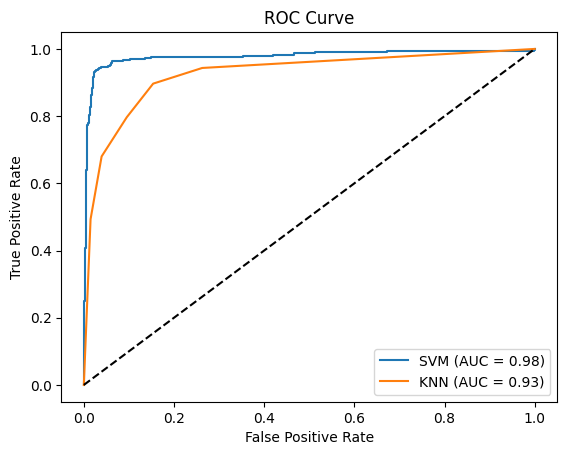

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

svm_probs = svm.decision_function(X_test_svm)
knn_probs = knn.predict_proba(X_test_knn)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)

plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(auc(fpr_svm, tpr_svm)))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(auc(fpr_knn, tpr_knn)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
